In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from citipy import citipy
import seaborn as sns
from scipy.stats import linregress

In [183]:
filepath = "Resources/Cleaned.csv"
df = pd.read_csv(filepath)
df.price.unique()

array(['$$$$$', '$$$$', '$$$', '$$', '$', 'No Price'], dtype=object)

In [184]:
df.head()

,Unnamed: 0,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,Michelin Star Count
0,0,Kilian Stuba,2019,47.348580,10.17114,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...,1
1,1,Pfefferschiff,2019,47.837870,13.07917,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
2,2,Esszimmer,2019,47.806850,13.03409,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
3,3,Carpe Diem,2019,47.800010,13.04006,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1
4,4,Edvard,2019,48.216503,16.36852,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1


In [185]:
mask = df.price != "No Price"
df_price = df.loc[mask]
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519 entries, 0 to 689
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           519 non-null    int64  
 1   name                 519 non-null    object 
 2   year                 519 non-null    int64  
 3   latitude             519 non-null    float64
 4   longitude            519 non-null    float64
 5   city                 519 non-null    object 
 6   region               519 non-null    object 
 7   zipCode              519 non-null    object 
 8   cuisine              519 non-null    object 
 9   price                519 non-null    object 
 10  url                  519 non-null    object 
 11  Michelin Star Count  519 non-null    int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 52.7+ KB


In [221]:
df_price['Price Point'] = df_price['price'].apply(lambda x: len(x))
df_price.head()

<ipython-input-221-c12ded5f275e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['Price Point'] = df_price['price'].apply(lambda x: len(x))


,Unnamed: 0,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,Michelin Star Count,Price Point
0,0,Kilian Stuba,2019,47.348580,10.17114,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...,1,5
1,1,Pfefferschiff,2019,47.837870,13.07917,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1,5
2,2,Esszimmer,2019,47.806850,13.03409,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1,5
3,3,Carpe Diem,2019,47.800010,13.04006,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1,5
4,4,Edvard,2019,48.216503,16.36852,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1,4


In [226]:
df_avgpr = df_price.groupby('region')['Price Point'].mean()
df_avgpr

region
Austria           4.947368
California        3.611111
Chicago           3.500000
Croatia           5.000000
Czech Republic    5.000000
Denmark           3.142857
Finland           3.000000
Greece            5.000000
Hong Kong         2.984127
Hungary           4.333333
Macau             2.473684
New York City     3.608108
Norway            3.750000
Poland            4.500000
Rio de Janeiro    5.000000
Sao Paulo         4.833333
Singapore         2.076923
South Korea       3.230769
Sweden            3.363636
Taipei            2.791667
Thailand          3.576923
Washington DC     3.250000
Name: Price Point, dtype: float64

In [236]:
avgprice = pd.concat([df_avgpr], axis=1).reset_index()
avgprice.columns = ["Region", "Average Price"]
avgprice1 = avgprice.sort_values(by=["Average Price"], ascending=False)
avgprice1

,Region,Average Price
3,Croatia,5.000000
4,Czech Republic,5.000000
14,Rio de Janeiro,5.000000
7,Greece,5.000000
0,Austria,4.947368
15,Sao Paulo,4.833333
13,Poland,4.500000
9,Hungary,4.333333
12,Norway,3.750000
1,California,3.611111


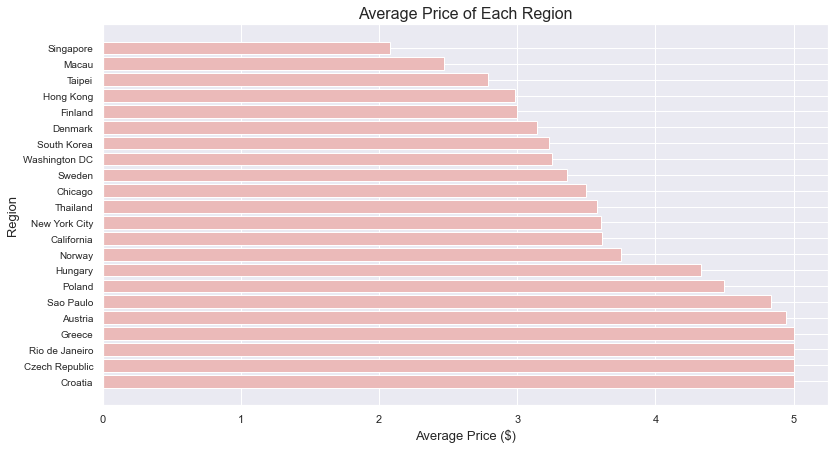

In [244]:
plt.figure(figsize=(13,7))

plt.barh(avgprice1.Region, avgprice1['Average Price'], color="#EBBAB9")
plt.xlabel("Average Price ($)", fontsize=13)
plt.ylabel("Region", fontsize=13)
plt.title("Average Price of Each Region", fontsize=16)
plt.yticks(fontsize=10)
plt.savefig("PricePerRegion.png")
plt.show()


In [201]:
df11 = pd.concat([df1], axis=1).reset_index()
df11.columns = ["Region", "Restaurants"]
summ11 = df11.sort_values(by=["Restaurants"], ascending=False)
summ11.head()

,Region,Restaurants
22,United Kingdom,162
1,California,90
12,New York City,74
8,Hong Kong,63
17,Singapore,39


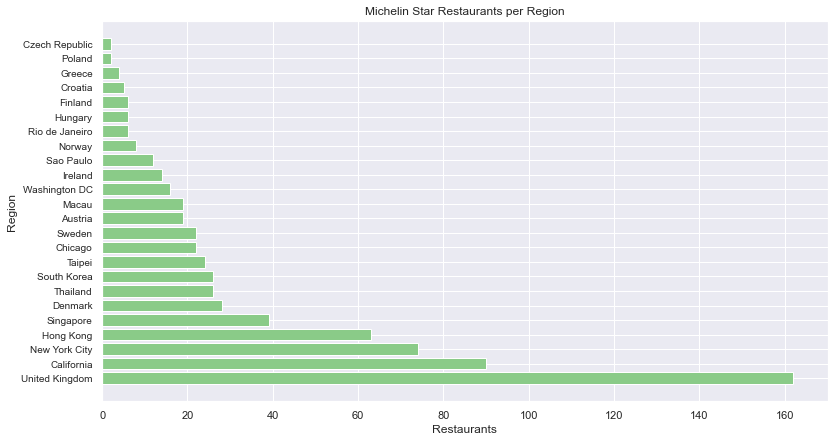

In [224]:
plt.figure(figsize=(13,7))

plt.barh(summ11.Region, summ11.Restaurants, color="#8ACB88")
plt.xlabel("Restaurants")
plt.ylabel("Region")
plt.title("Michelin Star Restaurants per Region")
plt.yticks(fontsize=10)

plt.show()

In [204]:
df10 = df.groupby("cuisine")["region"].count()
df12 = pd.concat([df10], axis=1).reset_index()
df12.columns = ["Cuisine", "Restaurants"]
summ12 = df12.sort_values(by=["Restaurants"], ascending=False)
summ12.head(10)

,Cuisine,Restaurants
45,Modern cuisine,108
13,Contemporary,75
34,Japanese,54
14,Creative,46
8,Cantonese,40
43,Modern British,38
22,French,29
30,Innovative,28
32,Italian,21
23,French contemporary,19


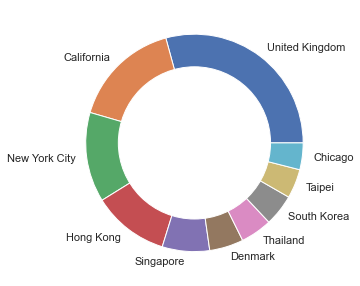

ValueError: 'label' must be of length 'x'

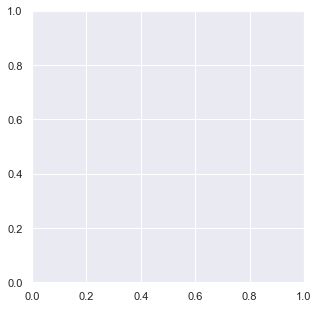

In [240]:
# https://www.python-graph-gallery.com/donut-plot/
plt.figure(figsize=(10,5))
size_of_groups = donut_df["Number of Restaurants"]
labels = donut_df.Cuisine
# Create a pieplot
plt.pie(size_of_groups, labels=labels)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()
plt.figure(figsize=(10,5))

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.title("US Region Breakdown", fontsize=14)

plt.show()

In [199]:
donut = pd.concat([df1], axis=1).reset_index()
donut.columns = ["Cuisine", "Number of Restaurants"]
donut_df = donut.sort_values(by=["Number of Restaurants"], ascending=False).head(10).reset_index()
donut_df

,index,Cuisine,Number of Restaurants
0,22,United Kingdom,162
1,1,California,90
2,12,New York City,74
3,8,Hong Kong,63
4,17,Singapore,39
5,5,Denmark,28
6,21,Thailand,26
7,18,South Korea,26
8,20,Taipei,24
9,2,Chicago,22


In [ ]:
# https://www.python-graph-gallery.com/donut-plot/
plt.figure(figsize=(10,5))
size_of_groups = 
labels = donut_df.Cuisine
# Create a pieplot
plt.pie(size_of_groups, labels=labels)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [189]:
mask1 = df_price.price == "$"
mask2 = df_price.price == "$$"
mask3 = df_price.price == "$$$"
mask4 = df_price.price == "$$$$"
mask5 = df_price.price == "$$$$$"
df1d = df_price.loc[mask1]
df1dol = df1d.region.value_counts()


In [190]:
df2d = df_price.loc[mask2]
df2dol = df2d.region.value_counts()

In [191]:
df3d = df_price.loc[mask3]
df3dol = df3d.region.value_counts()

In [192]:
df4d = df_price.loc[mask4]
df4dol = df4d.region.value_counts()

In [193]:
df5d = df_price.loc[mask5]
df5dol = df5d.region.value_counts()

In [194]:
regpr_df = pd.concat([df1dol, df2dol, df3dol, df4dol, df5dol, df1], axis=1)
regpr_df.columns = ["$ Count", "$$ Count", "$$$ Count", "4$ Count", "5$ Count", "Total"]
regpr_df = regpr_df.fillna(0)
#regpr.style.format({"$ Count":, "$$ Count", "$$$ Count", "4$ Count", "5$ Count"})

In [195]:
reg_br = regpr_df.astype(int)
reg_br

,$ Count,$$ Count,$$$ Count,4$ Count,5$ Count,Total
Singapore,16,11,7,3,2,39
Hong Kong,9,15,18,10,11,63
Macau,3,8,5,2,1,19
Taipei,1,9,8,6,0,24
South Korea,1,1,18,3,3,26
Thailand,1,4,6,9,6,26
New York City,0,7,15,52,0,74
California,0,6,23,61,0,90
Denmark,0,6,12,10,0,28
Washington DC,0,4,4,8,0,16


In [161]:
df_price['Price Point'] = df_price['price'].apply(lambda x: len(x))
df_price.head()

,Unnamed: 0,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,Michelin Star Count,Price Point
0,0,Kilian Stuba,2019,47.348580,10.17114,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...,1,5
1,1,Pfefferschiff,2019,47.837870,13.07917,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1,5
2,2,Esszimmer,2019,47.806850,13.03409,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1,5
3,3,Carpe Diem,2019,47.800010,13.04006,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1,5
4,4,Edvard,2019,48.216503,16.36852,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1,4


In [15]:
avgs = df_price.groupby('cuisine')['Price Point'].mean()
count = df_price.groupby('cuisine')['name'].count()
star = df_price.groupby('cuisine')["Michelin Star Count"].mean()
summ1 = pd.concat([avgs, star, count], axis=1).reset_index()
summ1.columns = ["Cuisine", "Average Price Point ($)", "Average Michelin Star Rating", "Total Restaurants"]
summ2 = summ1.sort_values(by=["Total Restaurants"], ascending=False).head(10)
summ2.style.format({"Average Price Point ($)":"{:.3f}", "Average Michelin Star Rating":"{:.3f}"})

,Cuisine,Average Price Point ($),Average Michelin Star Rating,Total Restaurants
13,Contemporary,3.693,1.507,75
32,Japanese,3.961,1.176,51
40,Modern cuisine,3.735,1.184,49
8,Cantonese,2.225,1.325,40
14,Creative,4.032,1.484,31
28,Innovative,3.536,1.286,28
21,French contemporary,3.263,1.579,19
30,Italian,3.500,1.167,18
20,French,3.611,1.333,18
53,Sushi,4.000,1.353,17


In [18]:
mask1 = df_price.price == "$"
mask2 = df_price.price == "$$"
mask3 = df_price.price == "$$$"
mask4 = df_price.price == "$$$$"
mask5 = df_price.price == "$$$$$"
df1d = df_price.loc[mask1]
df1dol = df1d.region.value_counts()



In [19]:
df2d = df_price.loc[mask2]
df2dol = df2d.region.value_counts()
df3d = df_price.loc[mask3]
df3dol = df3d.region.value_counts()
df4d = df_price.loc[mask4]
df4dol = df4d.region.value_counts()
df5d = df_price.loc[mask5]
df5dol = df5d.region.value_counts()
regpr_df = pd.concat([df1dol, df2dol, df3dol, df4dol, df5dol, df1], axis=1)
regpr_df.columns = ["$ Count", "$$ Count", "$$$ Count", "4$ Count", "5$ Count", "Total"]
regpr_df = regpr_df.fillna(0)
#regpr.style.format({"$ Count":, "$$ Count", "$$$ Count", "4$ Count", "5$ Count"})

In [119]:
reg_clean = regpr_df.astype(int)
reg_clean

,$ Count,$$ Count,$$$ Count,4$ Count,5$ Count,Total
Singapore,16,11,7,3,2,39
Hong Kong,9,15,18,10,11,63
Macau,3,8,5,2,1,19
Taipei,1,9,8,6,0,24
South Korea,1,1,18,3,3,26
Thailand,1,4,6,9,6,26
New York City,0,7,15,52,0,74
California,0,6,23,61,0,90
Denmark,0,6,12,10,0,28
Washington DC,0,4,4,8,0,16


In [120]:
totsumm = reg_clean.sort_values(by=["Total"], ascending=False).head(10).reset_index()
totsumm

,index,$ Count,$$ Count,$$$ Count,4$ Count,5$ Count,Total
0,California,0,6,23,61,0,90
1,New York City,0,7,15,52,0,74
2,Hong Kong,9,15,18,10,11,63
3,Singapore,16,11,7,3,2,39
4,Denmark,0,6,12,10,0,28
5,South Korea,1,1,18,3,3,26
6,Thailand,1,4,6,9,6,26
7,Taipei,1,9,8,6,0,24
8,Sweden,0,2,10,10,0,22
9,Chicago,0,2,7,13,0,22


In [130]:
dol1summ = reg_clean.sort_values(by=["$ Count"], ascending=False).head(5).reset_index()
dol1summ

,index,$ Count,$$ Count,$$$ Count,4$ Count,5$ Count,Total
0,Singapore,16,11,7,3,2,39
1,Hong Kong,9,15,18,10,11,63
2,Macau,3,8,5,2,1,19
3,Taipei,1,9,8,6,0,24
4,South Korea,1,1,18,3,3,26


In [132]:
dol2summ = reg_clean.sort_values(by=["$$ Count"], ascending=False).head(5).reset_index()
dol2summ

,index,$ Count,$$ Count,$$$ Count,4$ Count,5$ Count,Total
0,Hong Kong,9,15,18,10,11,63
1,Singapore,16,11,7,3,2,39
2,Taipei,1,9,8,6,0,24
3,Macau,3,8,5,2,1,19
4,New York City,0,7,15,52,0,74


In [133]:
dol3summ = reg_clean.sort_values(by=["$$$ Count"], ascending=False).head(5).reset_index()
dol3summ

,index,$ Count,$$ Count,$$$ Count,4$ Count,5$ Count,Total
0,California,0,6,23,61,0,90
1,Hong Kong,9,15,18,10,11,63
2,South Korea,1,1,18,3,3,26
3,New York City,0,7,15,52,0,74
4,Denmark,0,6,12,10,0,28


In [134]:
dol4summ = reg_clean.sort_values(by=["4$ Count"], ascending=False).head(6).reset_index()
dol4summ

,index,$ Count,$$ Count,$$$ Count,4$ Count,5$ Count,Total
0,California,0,6,23,61,0,90
1,New York City,0,7,15,52,0,74
2,Chicago,0,2,7,13,0,22
3,Sweden,0,2,10,10,0,22
4,Hong Kong,9,15,18,10,11,63
5,Denmark,0,6,12,10,0,28


In [135]:
dol5summ = reg_clean.sort_values(by=["5$ Count"], ascending=False).head(5).reset_index()
dol5summ

,index,$ Count,$$ Count,$$$ Count,4$ Count,5$ Count,Total
0,Austria,0,0,0,1,18,19
1,Hong Kong,9,15,18,10,11,63
2,Sao Paulo,0,0,1,0,11,12
3,Thailand,1,4,6,9,6,26
4,Rio de Janeiro,0,0,0,0,6,6


In [97]:
avgs = df_price.groupby('cuisine')['Price Point'].mean()
count = df_price.groupby('cuisine')['name'].count()
star = df_price.groupby('cuisine')["Michelin Star Count"].mean()
summ1 = pd.concat([avgs, star, count], axis=1).reset_index()
summ1.columns = ["Cuisine", "Average Price Point ($)", "Average Michelin Star Rating", "Total Restaurants"]
summ2 = summ1.sort_values(by=["Total Restaurants"], ascending=False).head(10).reset_index()
summ2.style.format({"Average Price Point ($)":"{:.3f}", "Average Michelin Star Rating":"{:.3f}"})

,index,Cuisine,Average Price Point ($),Average Michelin Star Rating,Total Restaurants
0,13,Contemporary,3.693,1.507,75
1,32,Japanese,3.961,1.176,51
2,40,Modern cuisine,3.735,1.184,49
3,8,Cantonese,2.225,1.325,40
4,14,Creative,4.032,1.484,31
5,28,Innovative,3.536,1.286,28
6,21,French contemporary,3.263,1.579,19
7,30,Italian,3.500,1.167,18
8,20,French,3.611,1.333,18
9,53,Sushi,4.000,1.353,17


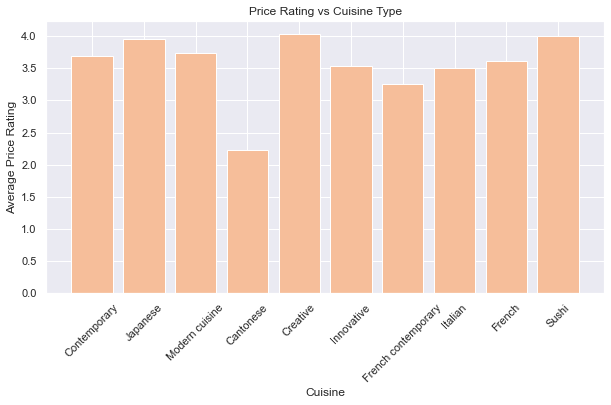

In [79]:
plt.figure(figsize=(10,5))
plt.bar(summ2.Cuisine, summ2["Average Price Point ($)"], color="#F6BE9A")
plt.xlabel("Cuisine")
plt.ylabel("Average Price Rating")
plt.title("Price Rating vs Cuisine Type")
plt.xticks(rotation = 45)
plt.show()

In [197]:
donut = pd.concat([df1], axis=1).reset_index()
donut.columns = ["Cuisine", "Number of Restaurants"]
donut_df = donut.sort_values(by=["Number of Restaurants"], ascending=False).head(10).reset_index()
donut_df

,index,Cuisine,Number of Restaurants
0,22,United Kingdom,162
1,1,California,90
2,12,New York City,74
3,8,Hong Kong,63
4,17,Singapore,39
5,5,Denmark,28
6,21,Thailand,26
7,18,South Korea,26
8,20,Taipei,24
9,2,Chicago,22


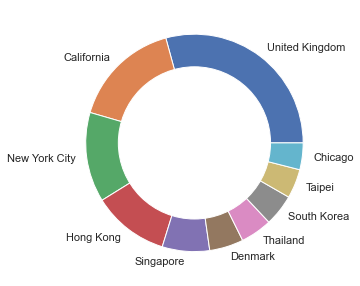

In [198]:
# https://www.python-graph-gallery.com/donut-plot/
plt.figure(figsize=(10,5))
size_of_groups = donut_df["Number of Restaurants"]
labels = donut_df.Cuisine
# Create a pieplot
plt.pie(size_of_groups, labels=labels)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

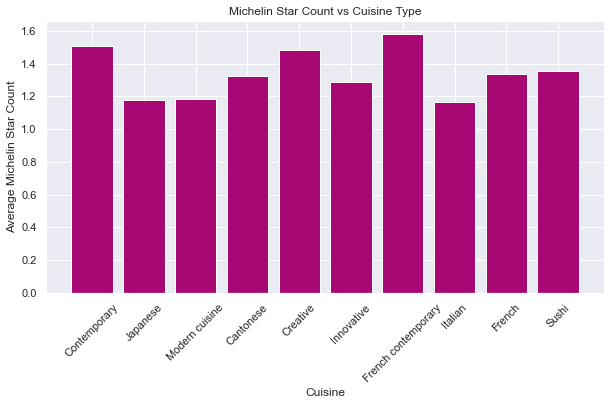

In [78]:
plt.figure(figsize=(10,5))
plt.bar(summ2.Cuisine, summ2["Average Michelin Star Rating"], color="#A80874")
plt.xlabel("Cuisine")
plt.ylabel("Average Michelin Star Count")
plt.title("Michelin Star Count vs Cuisine Type")
plt.xticks(rotation = 45)
plt.show()

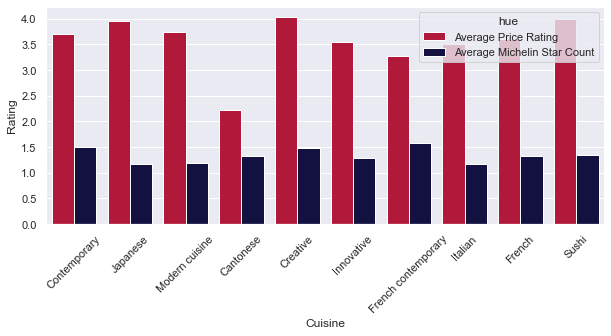

In [270]:
# https://stackoverflow.com/questions/37427362/plt-show-shows-full-graph-but-savefig-is-cropping-the-image/37428142
# https://stackoverflow.com/questions/50912819/how-to-combine-two-bar-chart-of-two-files-in-one-diagram-in-matplotlib-pandas
plt.figure(figsize=(10,4))

df1=pd.DataFrame({'Cuisine':['Contemporary', 'Japanese', 'Modern cuisine', 'Cantonese',
       'Creative', 'Innovative', 'French contemporary', 'Italian',
       'French', 'Sushi'],'Rating':[3.69333333, 3.96078431, 3.73469388, 2.225     , 4.03225806,
       3.53571429, 3.26315789, 3.5       , 3.61111111, 4       ]})
df2=pd.DataFrame({'Cuisine':['Contemporary', 'Japanese', 'Modern cuisine', 'Cantonese',
       'Creative', 'Innovative', 'French contemporary', 'Italian',
       'French', 'Sushi'],'Rating':[1.50666667, 1.17647059, 1.18367347, 1.325     , 1.48387097,
       1.28571429, 1.57894737, 1.16666667, 1.33333333, 1.35294118]})
df1['hue']= "Average Price Rating"
df2['hue']= "Average Michelin Star Count"
res=pd.concat([df1,df2])
sns.set(style="darkgrid")

sns.barplot(x='Cuisine',y='Rating',data=res,hue='hue',palette=["#C9002A", "#0C0948"])
plt.xticks(rotation = 45)
plt.savefig('SidebySide.png', bbox_inches = 'tight')
plt.show()


In [52]:
regUS_df = df_price.loc[(df_price['region'] == "California") | (df_price['region'] == "New York City") | (df_price['region'] == "Chicago") | (df_price['region'] == "Washington DC")]
regUS_df.info()        
                     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 12 to 689
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           202 non-null    int64  
 1   name                 202 non-null    object 
 2   year                 202 non-null    int64  
 3   latitude             202 non-null    float64
 4   longitude            202 non-null    float64
 5   city                 202 non-null    object 
 6   region               202 non-null    object 
 7   zipCode              202 non-null    object 
 8   cuisine              202 non-null    object 
 9   price                202 non-null    object 
 10  url                  202 non-null    object 
 11  Michelin Star Count  202 non-null    int64  
 12  Price Point          202 non-null    int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 22.1+ KB


In [55]:
regUS_df.head()

,Unnamed: 0,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,Michelin Star Count,Price Point
12,12,Chez TJ,2019,37.394680,-122.08044,South San Francisco,California,94041,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,1,4
13,13,Protégé,2019,37.427853,-122.14362,South San Francisco,California,94301,Contemporary,$$$,https://guide.michelin.com/us/en/california/so...,1,3
14,14,Madera,2019,37.420140,-122.21151,San Francisco,California,94025,Contemporary,$$$,https://guide.michelin.com/us/en/california/sa...,1,3
15,15,The Village Pub,2019,37.428970,-122.25178,San Francisco,California,94062,Contemporary,$$$,https://guide.michelin.com/us/en/california/sa...,1,3
16,16,Plumed Horse,2019,37.256480,-122.03537,South San Francisco,California,95070,Contemporary,$$$$,https://guide.michelin.com/us/en/california/so...,1,4


In [263]:
usprice = regUS_df.groupby(["region", "cuisine"]).agg({"Price Point": "mean", "name": 'count'}, axis=1).reset_index().set_index('region')
usprice

,cuisine,Price Point,name
region,,,
California,American,3.000000,2
California,Asian,3.500000,2
California,Californian,3.285714,14
California,Chinese,2.500000,2
California,Contemporary,3.771429,35
California,French,3.000000,2
California,Fusion,4.000000,2
California,Indian,3.000000,2
California,International,4.000000,1


In [210]:
dfusc = regUS_df.groupby("cuisine")["region"].count()
dfust = pd.concat([dfusc], axis=1).reset_index()
dfust.columns = ["Cuisine", "Restaurants"]
summusa = dfust.sort_values(by=["Restaurants"], ascending=False)
summusa10 = summusa.head(10)
summusa10

,Cuisine,Restaurants
5,Contemporary,75
13,Japanese,38
3,Californian,14
0,American,10
12,Italian,10
7,French,9
16,Mexican,6
14,Korean,5
19,Seafood,5
8,Fusion,4


In [218]:
maskcal = regUS_df.region == "California"
masknyc = regUS_df.region == "New York City"
maskchi = regUS_df.region == "Chicago"
maskdc = regUS_df.region == "Washington DC"

df1cal= regUS_df.loc[maskcal]
cal_df = df1cal.cuisine.value_counts()
df1nyc = regUS_df.loc[masknyc]
nyc_df = df1nyc.cuisine.value_counts()
df1chi= regUS_df.loc[maskchi]
chi_df = df1chi.cuisine.value_counts()
df1dc= regUS_df.loc[maskdc]
dc_df = df1dc.cuisine.value_counts()


Contemporary     7
American         3
Italian          2
Mediterranean    1
European         1
Japanese         1
Seafood          1
Name: cuisine, dtype: int64

In [220]:

usreg_df = pd.concat([cal_df, nyc_df, chi_df, dc_df], axis=1)

regpr_df = regpr_df.fillna(0)
#regpr.style.format({"$ Count":, "$$ Count", "$$$ Count", "4$ Count", "5$ Count"})

In [88]:
avgs2 = regUS_df.groupby('cuisine')['Price Point'].mean()
count2 = regUS_df.groupby('cuisine')['name'].count()
star2 = regUS_df.groupby('cuisine')["Michelin Star Count"].mean()
summus = pd.concat([avgs2, star2, count2], axis=1).reset_index()
summus.columns = ["Cuisine", "Average Price Point ($)", "Average Michelin Star Rating", "Total Restaurants"]
summus2 = summus.sort_values(by=["Total Restaurants"], ascending=False).head(10)
summus2.style.format({"Average Price Point ($)":"{:.3f}", "Average Michelin Star Rating":"{:.3f}"})


,Cuisine,Average Price Point ($),Average Michelin Star Rating,Total Restaurants
5,Contemporary,3.693,1.507,75
13,Japanese,3.842,1.158,38
3,Californian,3.286,1.071,14
0,American,3.100,1.200,10
12,Italian,3.700,1.100,10
7,French,3.667,1.222,9
16,Mexican,3.000,1.167,6
14,Korean,3.400,1.200,5
19,Seafood,3.800,1.800,5
8,Fusion,3.000,1.000,4


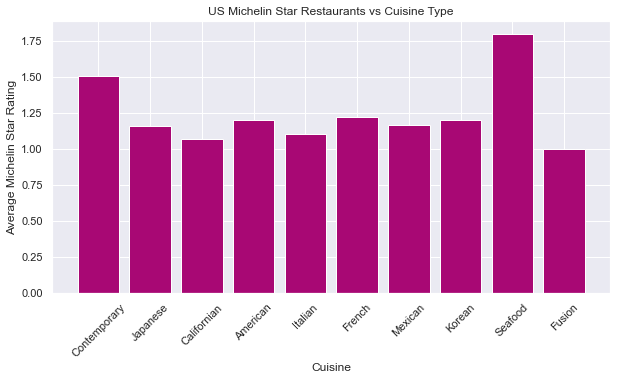

In [89]:
plt.figure(figsize=(10,5))
plt.bar(summus2.Cuisine, summus2["Average Michelin Star Rating"], color="#A80874")
plt.xlabel("Cuisine")
plt.ylabel("Average Michelin Star Rating")
plt.title("US Michelin Star Restaurants vs Cuisine Type")
plt.xticks(rotation = 45)
plt.show()

In [92]:
avgs3 = regUS_df.groupby('region')['Price Point'].mean()
count3 = regUS_df.groupby('region')['name'].count()
star3 = regUS_df.groupby('region')["Michelin Star Count"].mean()
summus3 = pd.concat([avgs3, star3, count3], axis=1).reset_index()
summus3.columns = ["Region", "Average Price Point ($)", "Average Michelin Star Rating", "Total Restaurants"]
summus4 = summus3.sort_values(by=["Total Restaurants"], ascending=False).head(10)
summus4.style.format({"Average Price Point ($)":"{:.3f}", "Average Michelin Star Rating":"{:.3f}"})

,Region,Average Price Point ($),Average Michelin Star Rating,Total Restaurants
0,California,3.611,1.311,90
2,New York City,3.608,1.324,74
1,Chicago,3.500,1.227,22
3,Washington DC,3.250,1.250,16


<Figure size 864x432 with 0 Axes>

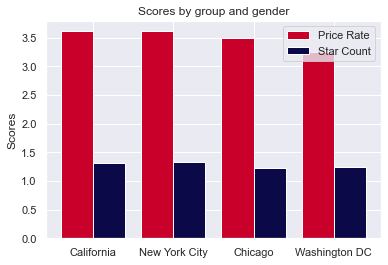

In [261]:
labels = summus4.Region
price_means = summus4['Average Price Point ($)']
star_means = summus4['Average Michelin Star Rating']
plt.figure(figsize=(12,6))
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, price_means, width, label='Price Rate', color="#C9002A")
rects2 = ax.bar(x + width/2, star_means, width, label='Star Count', color="#0C0948")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()





#autolabel(rects1)
#autolabel(rects2)

#fig.tight_layout()
plt.savefig('USsidexside.png')
plt.show()

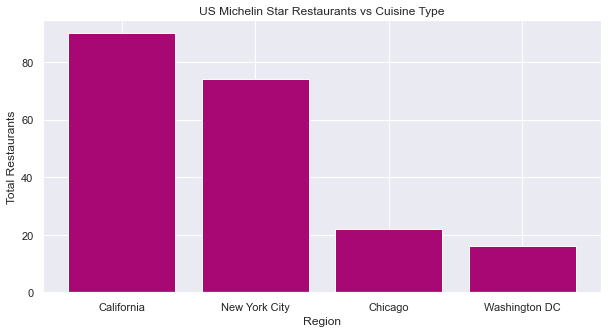

In [247]:
plt.figure(figsize=(10,5))
plt.bar(summus4.Region, summus4["Total Restaurants"], color="#A80874")
plt.xlabel("Region")
plt.ylabel("Total Restaurants")
plt.title("US Michelin Star Restaurants vs Cuisine Type")

plt.show()

In [178]:
# Labels for the sections of our pie chart
labels = summus4.Region

# The values of each section of the pie chart
sizes = summus4["Total Restaurants"]

# The colors of each section of the pie chart
colors = ["#C9D7F8", "#FECEF1", "#F3FFB6", "#A6F4DC"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.05, 0, 0, 0)

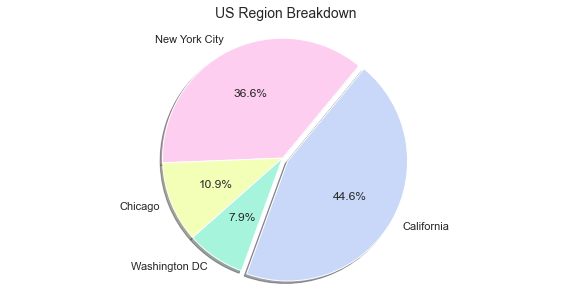

In [179]:
plt.figure(figsize=(10,5))

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.title("US Region Breakdown", fontsize=14)

plt.show()

In [ ]:
# 164 of the 695 michelin ster restaraunts worlwide are in California and New York City

In [207]:
uscuisine_df = regUS_df.groupby(['cuisine']).region.value_counts().unstack()
uscuisine_df

region,California,Chicago,New York City,Washington DC
cuisine,,,,
American,2.0,1.0,4.0,3.0
Asian,2.0,NaN,NaN,NaN
Austrian,NaN,NaN,1.0,NaN
Californian,14.0,NaN,NaN,NaN
Chinese,2.0,NaN,1.0,NaN
Contemporary,35.0,15.0,18.0,7.0
European,NaN,NaN,NaN,1.0
French,2.0,1.0,6.0,NaN
Fusion,2.0,1.0,1.0,NaN
